In [11]:
#24+严绮翘+191203101698
import re
import os
from pyecharts .globals import ChartType, SymbolType
from pyecharts import options as opts
from pyecharts.charts import Grid, Liquid, Funnel, Page, Bar, Pie, Map, Geo, Line
from pyecharts.faker import Collector
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from pyecharts.faker import Collector, Faker
import time
from datetime import time
from pyecharts.commons.utils import JsCode
import warnings
import numpy as np
import seaborn as sns
%matplotlib inline
# sns.set()
# import matplotlib
# matplotlib.use('qt5agg')
#指定默认字体
plt.rcParams['font.sans-serif'] = ['SimHei']
# matplotlib.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

In [12]:
df = pd.read_csv('df2.csv', encoding='GBK')

In [13]:
data2 = df[df['HeartDisease']==1]

[31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
[1, 2, 1, 2, 4, 2, 1, 11, 2, 6, 6, 3, 11, 6, 3, 13, 11, 15, 11, 14, 15, 19, 15, 23, 24, 25, 26, 28, 23, 24, 26, 25, 23, 15, 15, 7, 12, 6, 10, 6, 2, 3, 1, 5, 2, 1, 2]


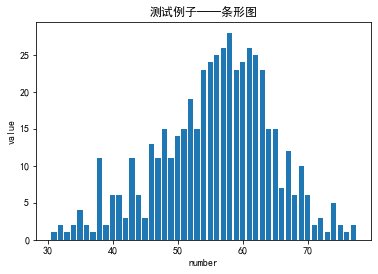

In [14]:
a = data2.groupby('Age').agg({'HeartDisease': 'count'})
data_pair = [list(z) for z in zip(a.index, a.values)]
data_pair
x_vals = []
y_vals = []
for i in range(len(data_pair)):
    x_vals.append(data_pair[i][0])
    y_vals.append(int(data_pair[i][1]))
print(x_vals)
print(y_vals)
plt.bar(x_vals,y_vals,width=0.8)
# plt.legend()

plt.xlabel('number')
plt.ylabel('value')

plt.title(u'测试例子——条形图')

plt.show()

In [15]:
bar = Bar().add_xaxis(x_vals)
bar.add_yaxis('心脏病患者数量', y_vals,
              markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_='average'),
                                                opts.MarkPointItem(type_='max'),
                                                opts.MarkPointItem(type_='min')],
                                                symbol_size=90)
              )
bar.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position='right'))
bar.set_global_opts(title_opts=opts.TitleOpts(title='Age-HeartDisease条形图'))
bar.reversal_axis() #翻转XY轴，将柱状图转换为条形图
bar.render('条形图.html')

'C:\\Users\\寒涧松\\Desktop\\新建文件夹\\条形图.html'

In [16]:
p2_2 = df.groupby('HeartDisease').agg({'RestingBP': 'mean','Cholesterol':'mean'})

In [17]:
p2_2

,RestingBP,Cholesterol
HeartDisease,,
0,130.180488,238.201071
1,134.449183,228.584692


In [18]:
RestingBP = list(p2_2.values[:,0].round(3))
Cholesterol = list(p2_2.values[:,1].round(3))
print(RestingBP)

[130.18, 134.449]


In [19]:
from pyecharts.render import make_snapshot
from snapshot_selenium import snapshot
x = ["HeartDisease:0","HeartDisease:1"]
c = (
    Bar()
    .add_xaxis(x)
    .add_yaxis("RestingBP", RestingBP, stack="stack1",category_gap="50%")
    .add_yaxis("Cholesterol", Cholesterol, stack="stack1",category_gap="50%")
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(title_opts=opts.TitleOpts(title="RestingBP-Cholesterol大小关系"),
                    
                    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15),name="因素",name_location = 'center',
                                            name_gap = 35),
                    yaxis_opts=opts.AxisOpts(name="静息血压:[mm Hg]\n\n血清胆固醇:[mg/dl]",name_location = 'center',
                                            name_gap = 35,),
                    )
)
c.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position='right'))
c.render('RestingBP-Cholesterol.html')


'C:\\Users\\寒涧松\\Desktop\\新建文件夹\\RestingBP-Cholesterol.html'

In [20]:
all_data2 = df.groupby('Sex').agg({"HeartDisease":'count'})
num_1 = data2.groupby('Sex').agg({"HeartDisease":'count'})
# p2_2 = data2.groupby('ChestPainType').agg({'RestingBP': 'mean','Cholesterol':'mean'})
print(all_data2)
print(num_1)
x1 = num_1.values[0]/all_data2.values[0]
x2 = num_1.values[1]/all_data2.values[1]
x1 = round(float(x1),3)
x2 = round(float(x2),3)
x3 = x2/(x1+x2)
print(x1)

     HeartDisease
Sex              
F             193
M             725
     HeartDisease
Sex              
F              50
M             458
0.259


In [21]:
C = None
C = Collector()
#水球图
@C.funcs
def liquid_base() -> Liquid:
    c = (
        Liquid()
            .add("{:.2%}".format(x1), [x1,0.5])
            .set_global_opts(title_opts=opts.TitleOpts(title="Sex为F(女)中HeartDisease为1的占比"))
            .set_series_opts(label_opts=opts.LabelOpts(is_show=True, position='inside'))
    )
    return c
@C.funcs
def liquid_base() -> Liquid:
    c = (
        Liquid()
            .add("{:.2%}".format(x2), [x2,0.7])
            .set_global_opts(title_opts=opts.TitleOpts(title="Sex为M(男)中HeartDisease为1的占比"))
            .set_series_opts(label_opts=opts.LabelOpts(is_show=True, position='inside',color= '#FF6633'))
    )
    return c
# c.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position='right'))
@C.funcs
def liquid_base() -> Liquid:
    c = (
        Liquid()
            .add("{:.2%}".format(x3), [x3,0.7])
            .set_global_opts(title_opts=opts.TitleOpts(title="HeartDisease为1中Sex为M(男)的占比"))
            .set_series_opts(label_opts=opts.LabelOpts(is_show=True, position='inside',color= '#FF6633'))
    )
    return c
Page().add(*[fn() for fn, _ in C.charts]).render(path='水球图.html')


'C:\\Users\\寒涧松\\Desktop\\新建文件夹\\水球图.html'

In [22]:
# all_data3 = df.groupby('Cholesterol').agg({"HeartDisease":'count'})
Not_Heart1_data3 = df[df['HeartDisease']==0]
# print(Not_Heart1_data3.count())
# print(data2.count())
data_pair1 = [list(z) for z in zip(Not_Heart1_data3['Age'], Not_Heart1_data3['Cholesterol'])]
# print(len(data_pair1))
# print(data_pair)
x_vals1 = []
y_vals1 = []
for i in range(len(data_pair1)):
    x_vals1.append(data_pair1[i][0])
    y_vals1.append(int(data_pair1[i][1]))
data_pair2 = [list(z) for z in zip(data2['Age'], data2['Cholesterol'])]
# print(len(data_pair2))
# print(data_pair)
x_vals2 = []
y_vals2 = []
for i in range(len(data_pair2)):
    x_vals2.append(data_pair2[i][0])
    y_vals2.append(int(data_pair2[i][1]))
# print(x_vals)
# print(y_vals)
# x_200 = []
# x_400 = []
# x_600 = []
# x_800 = []
y_200 = 0
y_400 = 0
y_600 = 0
y_800 = 0
for i in range(len(data_pair1)):
    if int(data_pair1[i][1])<=150:
#         x_200.append(data_pair1[i][0])
        y_200 = y_200 + 1
    elif int(data_pair1[i][1])<=300:
#         x_400.append(data_pair1[i][0])
        y_400 = y_400 + 1
    elif int(data_pair1[i][1])<=450:
#         x_600.append(data_pair1[i][0])
        y_600 = y_600 + 1
    elif int(data_pair1[i][1])>450:
#         x_800.append(data_pair1[i][0])
        y_800 = y_800 + 1
        
a1 = 0
a2 = 0
a3 = 0
a4 = 0
for i in range(len(data_pair2)):
    if int(data_pair2[i][1])<=150:
        a1 = a1 + 1
#         x_200.append(data_pair2[i][0])
#         y_200.append(int(data_pair2[i][1]))
    elif int(data_pair2[i][1])<=300:
        a2 = a2 + 1
#         x_400.append(data_pair2[i][0])
#         y_400.append(int(data_pair2[i][1]))
    elif int(data_pair2[i][1])<=450:
        a3 = a3 + 1
#         x_600.append(data_pair2[i][0])
#         y_600.append(int(data_pair2[i][1]))
    elif int(data_pair2[i][1])>450:
        a4 = a4 + 1
p1 = round(a1/y_200,3)
p2 = round(a2/y_400,3)
p3 = round(a3/y_600,3)
p4 = round(a4/y_800,3)
p = [p1,p2,p3,p4]
# print(p1,p2,p3,p4)
# print(a1+a2+a3+a4)
# print(y_200+y_400+y_600+y_800)

In [23]:
from pyecharts import options as opts
from pyecharts.charts import Scatter
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
scatter = (Scatter()
           .add_xaxis(x_vals1)
           .add_yaxis("健康人", y_vals1,
                      # 渐变效果实现部分
                      color=JsCode("""new echarts.graphic.RadialGradient(0.4, 0.3, 1, [{
                                        offset: 0,
                                        color: 'rgb(251, 118, 123)'
                                    }, {
                                        offset: 1,
                                        color: 'rgb(204, 46, 72)'
                                    }])"""))
           .add_xaxis(x_vals2)
           .add_yaxis("心脏病患者", y_vals2,
                      # 渐变效果实现部分
                      color=JsCode("""new echarts.graphic.RadialGradient(0.4, 0.3, 1, [{
                                         offset: 0,
                                        color: 'rgb(129, 227, 238)'
                                    }, {
                                        offset: 1,
                                         color: 'rgb(25, 183, 207)'
                                     }])"""))
           .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
           .set_global_opts(
               title_opts=opts.TitleOpts(title="Cholesterol与HeartDisease的关系"),
               tooltip_opts = opts.TooltipOpts(
                   formatter=JsCode("function (param) {return param.data[2];}")),
               xaxis_opts=opts.AxisOpts(
                   # 设置坐标轴为数值类型
                   type_="value", 
                   name="Age",name_location = 'center',
                   name_gap = 35,
                   # 显示分割线
                   splitline_opts=opts.SplitLineOpts(is_show=True)),
               yaxis_opts=opts.AxisOpts(
                   # 设置坐标轴为数值类型
                   type_="value",
                   # 默认为False表示起始为0
                   name="Cholesterol",name_location = 'center',
                   is_scale=True,
                   name_gap = 35,
                   splitline_opts=opts.SplitLineOpts(is_show=True),),
               # 数据中第三个度量值通过图形的size来展示
               visualmap_opts=opts.VisualMapOpts(is_show=True, type_='size', min_=df['Cholesterol'].min(), max_=df['Cholesterol'].max())
    ))
scatter.render('气泡图.html')
scatter.render_notebook() 

In [24]:
from pyecharts.charts import Line
from pyecharts import options

# 1.准备数据
cate = ['x<=150', '150<x<=300', '300<x<=450', '450<x']

# 2.创建图表
line = Line()

# 3. 关联数据
line.add_xaxis(cate)

line.add_yaxis('患者和正常人的人数比值', p,
               # 设置折线是否平滑
               is_smooth=True)
line.set_series_opts(markline_opts=options.MarkLineOpts(
        # 设置平均值的标记线
        data=[options.MarkPointItem(type_='average', name='平均值'),
              # 设置最大值的标记线
              options.MarkPointItem(type_='max', name='最大值')]
))
# HeartDisease 人数的影响
line.set_global_opts(title_opts=options.TitleOpts(title='Cholesterol大小对患者人数的影响'),
                    xaxis_opts=opts.AxisOpts(
                  
                   name="Cholesterol",name_location = 'center',
                   name_gap = 35,
                   # 显示分割线
                   splitline_opts=opts.SplitLineOpts(is_show=True)),
                   yaxis_opts=opts.AxisOpts(

                   # 默认为False表示起始为0
                   name="人数比值大小",name_location = 'center',
                   name_gap = 35))

# 5. 渲染数据
line.render('折线图.html')

'C:\\Users\\寒涧松\\Desktop\\新建文件夹\\折线图.html'